# Train regression

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [57]:
# === Step 1: Load Data ===
features_df = pd.read_csv("features_seven_steps.csv")
labels_df = pd.read_csv("labels_seven_steps.csv")

merged_df = pd.merge(features_df, labels_df, on="file")

In [58]:
# === Step 2: Prepare Input (X) and Output (y) ===
X = merged_df.drop(columns=["file", "EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"])
y = merged_df[["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
# === Step 3: Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [60]:
# === Step 4: Train Model ===
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# === Step 5: Predict & Evaluate ===
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.3745


In [62]:
# === Step 6: Compare Predictions ===
pred_df = pd.DataFrame(y_pred, columns=["EQ_80_pred", "EQ_240_pred", "EQ_2500_pred", "EQ_4000_pred", "EQ_10000_pred"])
pred_df[["EQ_80_true", "EQ_240_true", "EQ_2500_true", "EQ_4000_true", "EQ_10000_true"]] = y_test.reset_index(drop=True)
print(pred_df.head())

   EQ_80_pred  EQ_240_pred  EQ_2500_pred  EQ_4000_pred  EQ_10000_pred  \
0   -0.031369     0.008943     -0.102507      0.247804      -4.160590   
1    0.015351     0.007377     -8.158547      0.626608       0.058508   
2   -0.010097     0.014755      0.161636     -0.394068       8.263011   
3   -0.022466     0.001465     -0.027837      0.082951      -0.051357   
4   -0.096704     0.018093      1.221266      8.828625       0.737781   

   EQ_80_true  EQ_240_true  EQ_2500_true  EQ_4000_true  EQ_10000_true  
0         0.0          0.0           0.0           0.0           -4.0  
1         0.0          0.0          -8.0           0.0            0.0  
2         0.0          0.0           0.0           0.0            8.0  
3         0.0          0.0           0.0           0.0            0.0  
4         0.0          0.0           0.0          12.0            0.0  


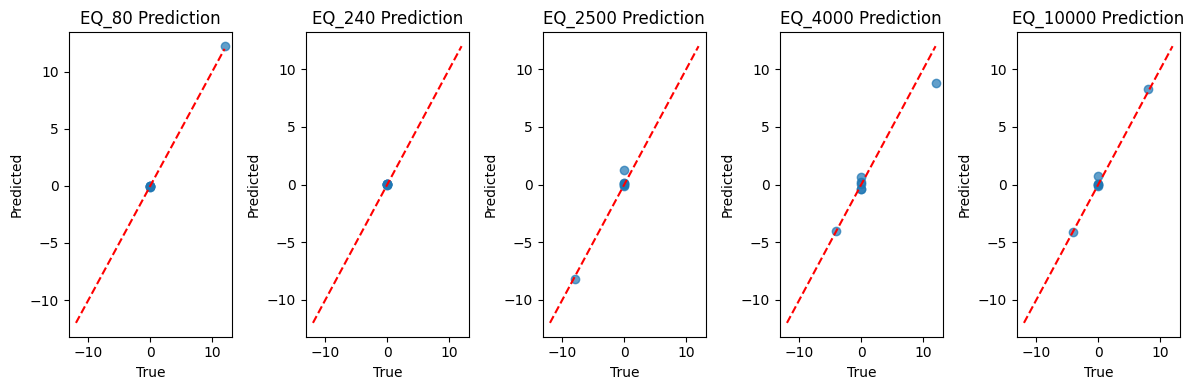

In [63]:
# === Step 7: Plot ===
plt.figure(figsize=(12, 4))
for i, label in enumerate(["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]):
    plt.subplot(1, 5, i+1)
    plt.scatter(pred_df[f"{label}_true"], pred_df[f"{label}_pred"], alpha=0.7)
    plt.plot([-12, 12], [-12, 12], color='r', linestyle='--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{label} Prediction")
plt.tight_layout()
plt.show()


## Interpolation test

In [53]:
# === Step 1: Load Interpolation Set ===
features_interp = pd.read_csv("features_interpolation.csv")
labels_interp = pd.read_csv("labels_interpolation.csv")

merged_interp = pd.merge(features_interp, labels_interp, on="file")

X_interp = merged_interp.drop(columns=["file", "EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"])
y_interp = merged_interp[["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]]

# === Step 2: Scale (用剛剛 train set 的 scaler) ===
X_interp_scaled = scaler.transform(X_interp)


In [54]:
# === Step 3: Predict ===
y_interp_pred = model.predict(X_interp_scaled)
mse_interp = mean_squared_error(y_interp, y_interp_pred)
print(f"Interpolation Set Mean Squared Error: {mse_interp:.4f}")

# === Step 4: Compare Predictions ===
pred_interp_df = pd.DataFrame(y_interp_pred, columns=["EQ_80_pred", "EQ_240_pred", "EQ_2500_pred", "EQ_4000_pred", "EQ_10000_pred"])
pred_interp_df[["EQ_80_true", "EQ_240_true", "EQ_2500_true", "EQ_4000_true", "EQ_10000_true"]] = y_interp.reset_index(drop=True)
print(pred_interp_df.head())



Interpolation Set Mean Squared Error: 0.0272
   EQ_80_pred  EQ_240_pred  EQ_2500_pred  EQ_4000_pred  EQ_10000_pred  \
0   -0.014249     0.983096     -0.040835      0.125450      -0.032320   
1   -0.077950    10.010326      0.033660     -0.169796      -0.403201   
2   -0.074553    11.014336      0.037581     -0.112318      -0.315910   
3   -0.006115     1.990865     -0.033100      0.115335       0.008728   
4    0.004487     3.006608     -0.004748      0.044245       0.073340   

   EQ_80_true  EQ_240_true  EQ_2500_true  EQ_4000_true  EQ_10000_true  
0         0.0          1.0           0.0           0.0            0.0  
1         0.0         10.0           0.0           0.0            0.0  
2         0.0         11.0           0.0           0.0            0.0  
3         0.0          2.0           0.0           0.0            0.0  
4         0.0          3.0           0.0           0.0            0.0  


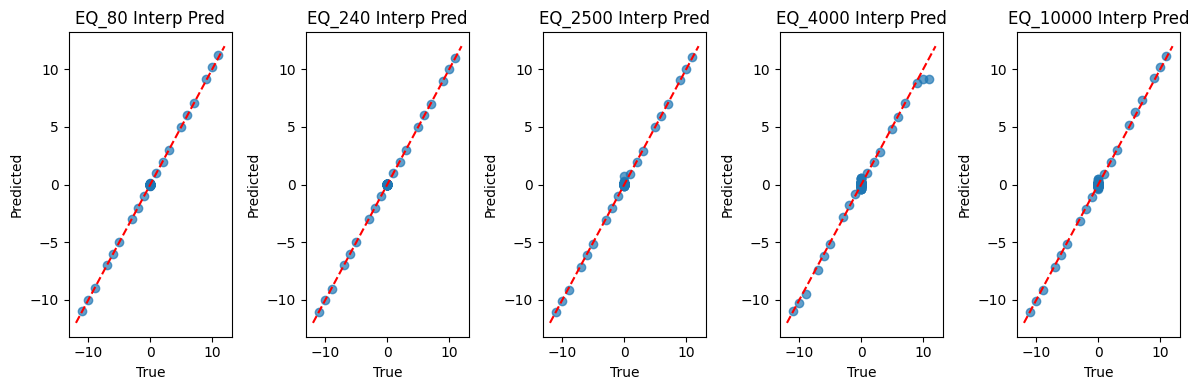

In [55]:
# === Step 5: Plot ===
plt.figure(figsize=(12, 4))
for i, label in enumerate(["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]):
    plt.subplot(1, 5, i+1)
    plt.scatter(pred_interp_df[f"{label}_true"], pred_interp_df[f"{label}_pred"], alpha=0.7)
    plt.plot([-12, 12], [-12, 12], color='r', linestyle='--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{label} Interp Pred")
plt.tight_layout()
plt.show()